#### 쇼핑몰 
- 온라인 리테일 사이트의 2010/12 ~ 2011/12 주문기록 데이터
- 500,000 건 데이터

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 한글설정
# plt.rcParams["font.family"] = "Malgun Gothic"
# - 설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter(action="ignore")

In [9]:
# 데이터 로드
retail_df = pd.read_excel("./resources/Online Retail.xlsx")
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


- InvoiceNo : 주문번호
- StockCode : 상품코드
- Description : 상품상세설명
- Quantity : 주문수량
- InvoiceDate : 주문시각
- UnitPrice : 상품가격
- CustomerID : 주문자 아이디
- Country : 고객 거주 지역(국가)

In [17]:
# 데이터 탐색

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [19]:
retail_df.shape

(541909, 8)

In [10]:
# 데이터 전처리(data cleansing)
# null, 가격 0원, 수량 - 값 해결

# 널 합계
retail_df.isna().sum()

# CustomerID 가 NaN 인 데이터 조회
# retail_df[retail_df["CustomerID"].isna()]

# 널 제거
# retail_df = retail_df[~retail_df["CustomerID"].isna()]
# retail_df = retail_df[retail_df["CustomerID"].notna()]
retail_df.dropna(subset=["CustomerID"], inplace=True)

In [21]:
retail_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
retail_df.shape

(406829, 8)

In [23]:
# 수량, 가격이 > 0 데이터 조회

retail_df.query("Quantity > 0").shape[0]
retail_df.query("UnitPrice > 0").shape[0]

406789

In [24]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]

In [25]:
# 정리 후 

retail_df.shape

(397884, 8)

In [11]:
# 컬럼별 전체 데이터 타입 확인
retail_df.dtypes

# CustomerID 데이터 타입 변경 : int32
# astype() or pd.to_numeric()

retail_df["CustomerID"] = retail_df["CustomerID"].astype("int32")

In [12]:
# 고객총지출비용 = 수량 * 금액
retail_df["CheckoutPrice"] = retail_df["Quantity"] * retail_df["UnitPrice"]

In [28]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [29]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [13]:
retail_df.to_csv("./resources/OnlineRetailClean.csv",index=False)

In [14]:
dtypes = {
    "UnitPrice":np.float32,
    "CustomerID":np.int32,
    "Quantity":np.int32
}
retail_df1 = pd.read_csv("./resources/OnlineRetailClean.csv",dtype=dtypes)
retail_df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [32]:
retail_df.dtypes

InvoiceNo                object
StockCode                object
Description              object
Quantity                  int64
InvoiceDate      datetime64[ns]
UnitPrice               float64
CustomerID                int32
Country                  object
CheckoutPrice           float64
dtype: object

In [15]:
# 매출 분석 - 전체, 국가별, 월별, 요일별, 시간별

# 전체 매출액
print(retail_df1["CheckoutPrice"].sum())
print(sum(retail_df1["CheckoutPrice"]))

total_revenue = sum(retail_df1["CheckoutPrice"])

8300065.814000001
8300065.814


In [17]:
# 국가별 매출

rev_by_contries = retail_df1.groupby("Country")["CheckoutPrice"].sum().sort_values(ascending=False)
rev_by_contries

Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

In [35]:
COLORS = sns.color_palette()
COLORS

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [18]:
# 국가별 매출 그래프

# rev_by_contries.plot.bar()
g = rev_by_contries.plot(kind="bar",figsize=(20,10),color=COLORS[-1])
g.set_xlabel("Country", fontsize=11)
g.set_ylabel("Revenue", fontsize=11)
g.set_title("Revenue by Country",fontsize=13)
g.set_xticklabels(labels=rev_by_contries.index, rotation=45);

NameError: name 'COLORS' is not defined

In [37]:
# 국가별 매출액 점유율 확인

rev_by_contries / total_revenue

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

In [38]:
# 차트 작성 함수화

def plot_bar(df, xlabel, ylabel, title, color=COLORS[-1], figsize=(20,10), rotation=45):
    g = df.plot(kind="bar",figsize=figsize,color=color,rot=rotation)
    g.set_xlabel(xlabel, fontsize=11)
    g.set_ylabel(ylabel, fontsize=11)
    g.set_title(title,fontsize=13)   

In [39]:
# 월별 매출

retail_df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [40]:
ser1 = pd.Series(pd.Timestamp('2010-01-01 08:26:00'))
ser1

# 201012, 201001

0   2010-01-01 08:26:00
dtype: datetime64[ns]

In [41]:
# InvoiceDate(object) => datetime 타입 변경
retail_df1["InvoiceDate"] = pd.to_datetime(retail_df1["InvoiceDate"]) 
retail_df1.dtypes

InvoiceNo                 int64
StockCode                object
Description              object
Quantity                  int32
InvoiceDate      datetime64[ns]
UnitPrice               float32
CustomerID                int32
Country                  object
CheckoutPrice           float64
dtype: object

In [42]:
def extract_month(date):
    #print(date.dt.year)
    # print(date.dt.month)   

    month = str(date.month)
    if date.month < 10:
        month = "0"+month
    return str(date.year) + month 

In [43]:
rev_by_month = retail_df1.set_index("InvoiceDate").groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

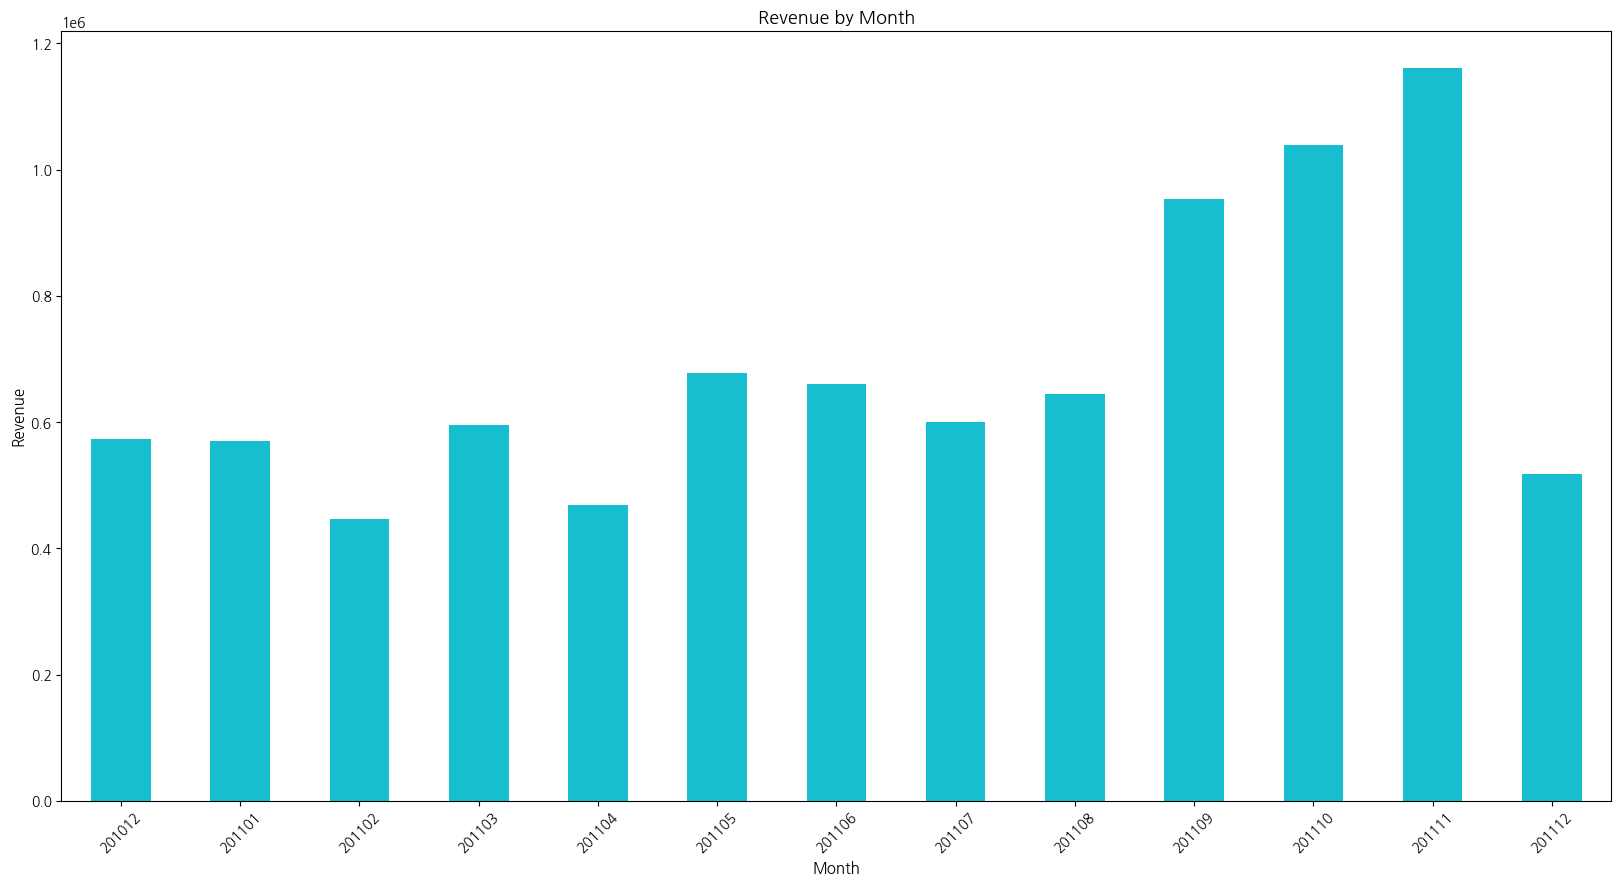

In [44]:
plot_bar(rev_by_month,"Month","Revenue","Revenue by Month")

In [45]:
# 요일별 매출

date = pd.to_datetime('2025-02-06')
# 0: 월요일 ~ 6:일요일
date.day_of_week

3

In [46]:
rev_by_dow = retail_df1.set_index("InvoiceDate").groupby(lambda date:date.dayofweek)['CheckoutPrice'].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

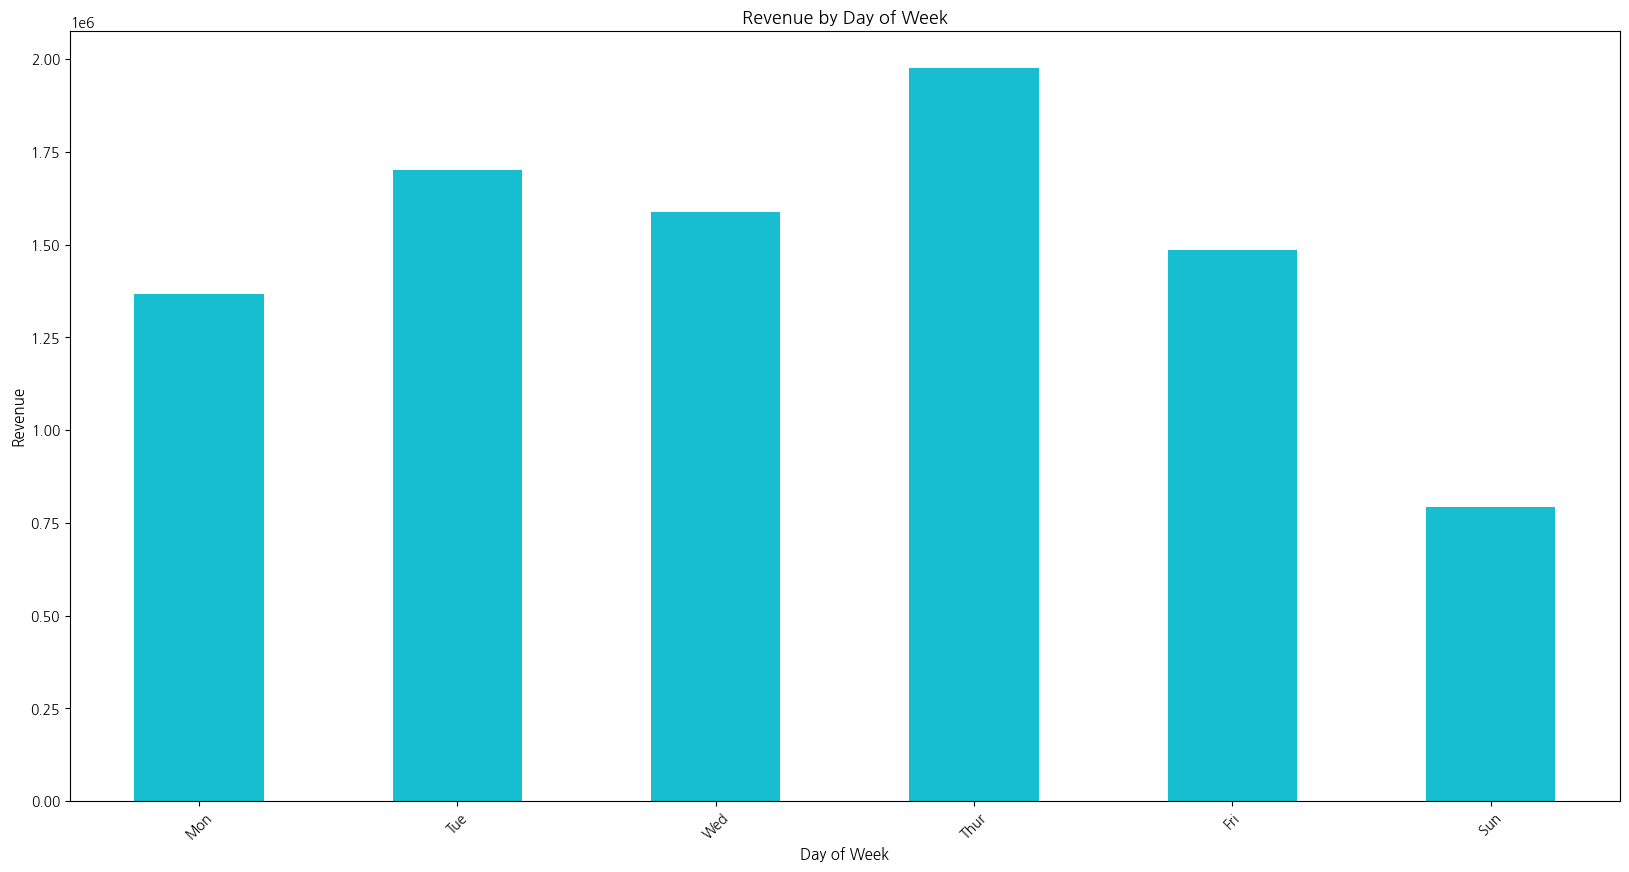

In [47]:
DAY_OF_WEEK = np.array(["Mon","Tue", "Wed", "Thur", "Fri", "Sat", "Sun"])

rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

plot_bar(rev_by_dow,"Day of Week","Revenue","Revenue by Day of Week")

In [48]:
# 시간별 매출

rev_by_hour = retail_df1.set_index("InvoiceDate").groupby(lambda date:date.dayofweek)['CheckoutPrice'].sum()
rev_by_hour

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

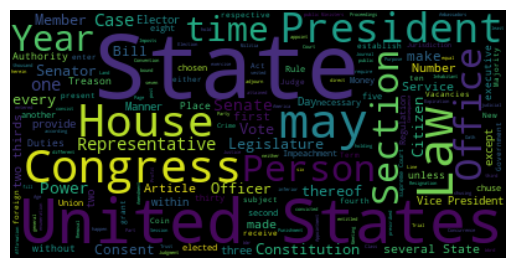

In [54]:
from wordcloud import WordCloud

text = open('./resources/constitution.txt').read()

wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

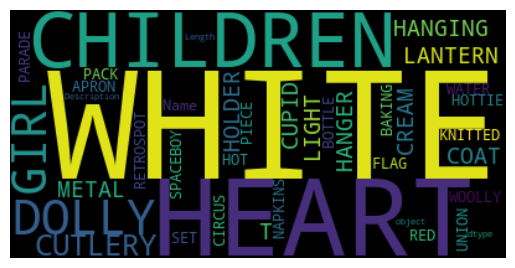

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(retail_df1["Description"]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
# 월별 재구매율 분석하기
# retention : 특정 기간동안 활성화된 고객의수

from datetime import datetime

def get_month_as_datetime(date):
    return datetime(date.year,date.month,1)

In [25]:
retail_df1["Month"] = retail_df1["InvoiceDate"].apply(get_month_as_datetime)
retail_df1.head(3)

AttributeError: 'str' object has no attribute 'year'

In [26]:
# 첫구매로부터 얼마나 지나서 재구매를 했는가?

retail_df1["MonthPassed"] = (retail_df1["Month"].dt.year - retail_df1["MonthStarted"].dt.year) * 12 + \
    (retail_df1["Month"].dt.mouth - retail_df1["MonthStarted"].dt.month)

KeyError: 'Month'